# Exploring Features of Parkinsonism

This notebook shows how to clean and visualize the Features of Parkinsonism data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pie.data_loader import DataLoader
from pie.data_preprocessor import DataPreprocessor

In [2]:
# Load data, and check we have Features of Parkinsonism
data = DataLoader.load("../PPMI")
fp_df = data[DataLoader.MEDICAL_HISTORY]["Features_of_Parkinsonism"]
print(fp_df.shape)
fp_df.head()

2025-04-11 11:25:27 data_loader.py [INFO] Loading subject_characteristics data...
2025-04-11 11:25:27 data_loader.py [WARNING] Directory not found: ../PPMI/_Subject_Characteristics
2025-04-11 11:25:27 data_loader.py [INFO] Loading medical_history data...
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: Adverse_Event
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: AV-133_Prodromal
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: C05-05_PET_Imaging_Substudy
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: Clinical_Diagnosis
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: Clinical_Global_Impression
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: Determination_of_Freezing_and_Falls
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: DPA-714_PET_Imaging_Substudy_Adverse_Event
2025-04-

/Users/vic/Projects/MJFF/PIE/pie/med_hist_loader.py:142: DtypeWarning: Columns (6,7,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(csv_file)


2025-04-11 11:25:27 data_loader.py [INFO] Loaded 4 medical_history tables
2025-04-11 11:25:27 data_loader.py [INFO] Loading motor_assessments data...
2025-04-11 11:25:27 data_loader.py [WARNING] Directory not found: ../PPMI/Motor___MDS-UPDRS
2025-04-11 11:25:27 data_loader.py [INFO] Loading non_motor_assessments data...
2025-04-11 11:25:27 data_loader.py [WARNING] Directory not found: ../PPMI/Non-motor_Assessments
2025-04-11 11:25:27 data_loader.py [INFO] Loading clinical data...
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: Adverse_Event
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: AV-133_Prodromal
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: C05-05_PET_Imaging_Substudy
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: Clinical_Diagnosis
2025-04-11 11:25:27 med_hist_loader.py [WARNING] No CSV file found for prefix: Clinical_Global_Impression
2025-04-11 11:2

/Users/vic/Projects/MJFF/PIE/pie/med_hist_loader.py:142: DtypeWarning: Columns (6,7,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(csv_file)


2025-04-11 11:25:28 data_loader.py [INFO] Loaded clinical data
2025-04-11 11:25:28 data_loader.py [INFO] Loading biologics data...
2025-04-11 11:25:28 data_loader.py [INFO] Loaded biologics data
2025-04-11 11:25:28 data_loader.py [INFO] Loading imaging data...
2025-04-11 11:25:28 data_loader.py [INFO] Loaded imaging data
2025-04-11 11:25:28 data_loader.py [INFO] Loading wearables data...
2025-04-11 11:25:28 data_loader.py [INFO] Loaded wearables data
2025-04-11 11:25:28 data_loader.py [INFO] Loading exams data...
2025-04-11 11:25:28 data_loader.py [INFO] Loaded exams data
(21787, 12)


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,FEATBRADY,FEATPOSINS,FEATRIGID,FEATTREMOR,PSGLVL,ORIG_ENTRY,LAST_UPDATE
0,720683801,3000,V10,DIAGFEAT,03/2015,0.0,0.0,0.0,0.0,NaN,12/2018,2020-06-25 16:02:23.0
1,565128201,3000,V12,DIAGFEAT,04/2016,0.0,0.0,0.0,0.0,NaN,04/2016,2020-06-25 16:02:23.0
2,736287401,3000,V15,DIAGFEAT,03/2019,0.0,0.0,0.0,0.0,NaN,04/2019,2020-06-25 16:02:24.0
3,IA32673,3000,V17,FEATPD,05/2021,0.0,0.0,0.0,0.0,5.0,06/2021,2021-06-01 00:00:00.0
4,IA32676,3001,R18,FEATPD,09/2022,1.0,2.0,2.0,1.0,1.0,09/2022,2022-09-30 00:00:00.0


In [3]:
# Clean the data, by mapping Uncertain values in each feature to 0.5
# (half way between No (0) and Yes (1))
clean_df = DataPreprocessor.clean_features_of_parkinsonism(fp_df)
print(clean_df.columns.tolist())
clean_df["FEATBRADY"].value_counts()

['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'FEATBRADY', 'FEATPOSINS', 'FEATRIGID', 'FEATTREMOR', 'PSGLVL', 'ORIG_ENTRY', 'LAST_UPDATE']


FEATBRADY
1.0    11008
0.0    10013
0.5      760
Name: count, dtype: int64

In [4]:
# Create a count of how many of the features are present
clean_df["Feature count"] = clean_df[
    ["FEATBRADY", "FEATPOSINS", "FEATRIGID", "FEATTREMOR"]].sum(axis=1)
clean_df["Feature count"].value_counts()

Feature count
0.0    7797
3.0    4246
4.0    3817
2.0    1827
0.5    1769
1.0    1251
2.5     371
1.5     361
3.5     348
Name: count, dtype: int64

<Axes: xlabel='Feature count', ylabel='count'>

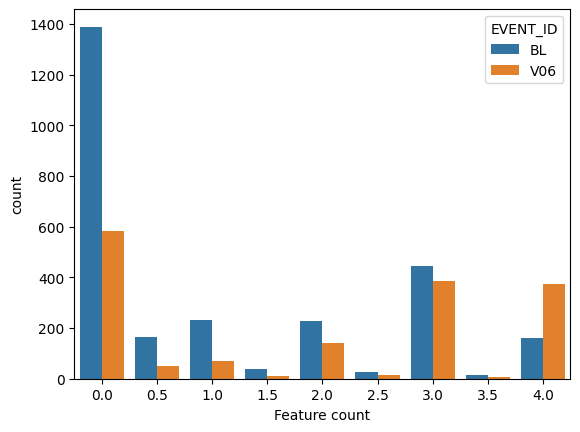

In [5]:
# Plot counts of patients with features at BL and at 2 years (V06)
timepoints = ["BL", "V06"]
sns.countplot(data=clean_df[clean_df["EVENT_ID"].isin(timepoints)], x="Feature count",
              hue="EVENT_ID", hue_order=timepoints)

We can see that at BL, the overwhelming majority of participants have no features of Parkinsonism (almost 1400 participants). By V06 the majority still have zero features, but the count of those with 3 or 4 features has increased as a proportion of the dataset. This may reflect the difference between PD patients and Healthy Controls.